#📌 Extracción y Normalizacion

##Extraccion

In [206]:
import pandas as pd
import numpy as np

In [207]:
url = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'
df = pd.read_json(url)
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


## Normalizacion

In [208]:

# Se normaliza los puntos anidados
customer_df = pd.json_normalize(df['customer'])
phone_df = pd.json_normalize(df['phone'])
internet_df = pd.json_normalize(df['internet'])
account_df = pd.json_normalize(df['account'])

# se eliminan las columnas originales.
df.drop(columns=['customer', 'phone', 'internet', 'account'], inplace=True)

#se une los df normalizados al original
df_normalizado = pd.concat([df, customer_df, phone_df, internet_df, account_df], axis=1)

df_normalizado.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


#🔧 Transformación

## Conociendo los datos

In [209]:
df_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [210]:
df_normalizado.describe()

,SeniorCitizen,tenure,Charges.Monthly
count,7267.000000,7267.000000,7267.000000
mean,0.162653,32.346498,64.720098
std,0.369074,24.571773,30.129572
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.425000
50%,0.000000,29.000000,70.300000
75%,0.000000,55.000000,89.875000
max,1.000000,72.000000,118.750000


In [211]:
df_normalizado.isna().sum()

,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


In [212]:
df_normalizado.duplicated().sum()

np.int64(0)

In [213]:
df_normalizado.columns

Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly',
       'Charges.Total'],
      dtype='object')

In [214]:

null_churn = (df_normalizado['Churn'] == '').sum()
null_charges =(df_normalizado['Charges.Total'] == ' ').sum()

print(f'Cantidad de nulos: {null_churn}')
print(f'Cantidad de nulos: {null_charges}')

Cantidad de nulos: 224
Cantidad de nulos: 11


In [215]:
#dejamos los valores vacios en nan
df_normalizado['Churn'] = df_normalizado['Churn'].replace('', np.nan)
df_normalizado['Charges.Total'] = df_normalizado['Charges.Total'].replace(' ', np.nan)
df_normalizado.isna().sum()

,0
customerID,0
Churn,224
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


Procederemos a cambiar el nombre de las columnas, para facilitar el analisis
* customerID: número de identificación único de cada cliente
* Churn: si el cliente dejó o no la empresa
* gender: género (masculino y femenino)
* SeniorCitizen: información sobre si un cliente tiene o no una edad igual o mayor a 65 años
* Partner: si el cliente tiene o no una pareja
* Dependents: si el cliente tiene o no dependientes
*tenure: meses de contrato del cliente
* PhoneService: suscripción al servicio telefónico
* MultipleLines: suscripción a más de una línea telefónica
* InternetService: suscripción a un proveedor de internet
* OnlineSecurity: suscripción adicional de seguridad en línea
* OnlineBackup: suscripción adicional de respaldo en línea
* DeviceProtection: suscripción adicional de protección del dispositivo
* TechSupport: suscripción adicional de soporte técnico, menor tiempo de espera
* StreamingTV: suscripción de televisión por cable
* StreamingMovies: suscripción de streaming de películas
+ Contract: tipo de contrato
+ PaperlessBilling: si el cliente prefiere recibir la factura en línea
+ PaymentMethod: forma de pago
+ Charges.Monthly: total de todos los servicios del cliente por mes
+ Charges.Total: total gastado por el cliente


In [216]:
df_normalizado.rename(columns={
    'customerID': 'ID',
    'Churn':'cancelo',
    'gender': 'genero',
    'SeniorCitizen': 'senior',
    'Partner': 'tiene_pareja',
    'Dependents': 'tiene_dependentes',
    'tenure': 'meses_de_contrato',
    'PhoneService': 'servicio_telefonico',
    'MultipleLines': 'lineas_multiples',
    'InternetService': 'servicio_internet',
    'OnlineSecurity': 'seguridad_en_linea',
    'OnlineBackup': 'Soporte_en_linea',
    'DeviceProtection': 'proteccion_dispositivos',
    'TechSupport': 'soporte_tec',
    'StreamingTV': 'tv',
    'StreamingMovies': 'streaming',
    'PaperlessBilling': 'facturas_electronicas',
    'PaymentMethod': 'metodo_pago',
    'Contract': 'tipo_contrato',
    'Charges.Monthly': 'gastos_mensuales',
    'Charges.Total': 'gastos_totales'
}, inplace=True)
df_normalizado.head()

,ID,cancelo,genero,senior,tiene_pareja,tiene_dependentes,meses_de_contrato,servicio_telefonico,lineas_multiples,servicio_internet,...,Soporte_en_linea,proteccion_dispositivos,soporte_tec,tv,streaming,tipo_contrato,facturas_electronicas,metodo_pago,gastos_mensuales,gastos_totales
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


Procederemos a transformar los datos a numero, para posterior de ello, realizar imputacion multiple

In [217]:
df_normalizado.columns

Index(['ID', 'cancelo', 'genero', 'senior', 'tiene_pareja',
       'tiene_dependentes', 'meses_de_contrato', 'servicio_telefonico',
       'lineas_multiples', 'servicio_internet', 'seguridad_en_linea',
       'Soporte_en_linea', 'proteccion_dispositivos', 'soporte_tec', 'tv',
       'streaming', 'tipo_contrato', 'facturas_electronicas', 'metodo_pago',
       'gastos_mensuales', 'gastos_totales'],
      dtype='object')

In [218]:
#primero se crean valores binarios en Cancelo, Genero, Senior, tiene dependientes...
columnas_binarias = df_normalizado[['cancelo', 'genero', 'senior', 'tiene_pareja',
       'tiene_dependentes', 'servicio_telefonico',
       'lineas_multiples', 'seguridad_en_linea',
       'Soporte_en_linea', 'proteccion_dispositivos', 'soporte_tec', 'tv',
       'streaming', 'facturas_electronicas', 'metodo_pago']]



for i in columnas_binarias:
  print(f'La columna {i} tiene estos datos: {df_normalizado[i].unique()}')
"""
no es factible por el momento, se descarta imputacion multiple y se procede a eliminar los valores nan
"""

La columna cancelo tiene estos datos: ['No' 'Yes' nan]
La columna genero tiene estos datos: ['Female' 'Male']
La columna senior tiene estos datos: [0 1]
La columna tiene_pareja tiene estos datos: ['Yes' 'No']
La columna tiene_dependentes tiene estos datos: ['Yes' 'No']
La columna servicio_telefonico tiene estos datos: ['Yes' 'No']
La columna lineas_multiples tiene estos datos: ['No' 'Yes' 'No phone service']
La columna seguridad_en_linea tiene estos datos: ['No' 'Yes' 'No internet service']
La columna Soporte_en_linea tiene estos datos: ['Yes' 'No' 'No internet service']
La columna proteccion_dispositivos tiene estos datos: ['No' 'Yes' 'No internet service']
La columna soporte_tec tiene estos datos: ['Yes' 'No' 'No internet service']
La columna tv tiene estos datos: ['Yes' 'No' 'No internet service']
La columna streaming tiene estos datos: ['No' 'Yes' 'No internet service']
La columna facturas_electronicas tiene estos datos: ['Yes' 'No']
La columna metodo_pago tiene estos datos: ['Mail

'\nno es factible por el momento, se descarta imputacion multiple y se procede a eliminar los valores nan\n'

In [219]:
df_normalizado = df_normalizado.dropna(subset=['cancelo', 'gastos_totales'])
df_normalizado.isna().sum()

,0
ID,0
cancelo,0
genero,0
senior,0
tiene_pareja,0
tiene_dependentes,0
meses_de_contrato,0
servicio_telefonico,0
lineas_multiples,0
servicio_internet,0


In [220]:
# se transforma la mayor cantidad de variables a numericas
dict_cancelo = {'No': 0, 'Yes': 1}
dict_genero = {'Female': 0, 'Male': 1}
dict_senior = {0: 0, 1: 1}
dict_tiene_pareja = {'Yes': 1, 'No': 0}
dict_tiene_dependentes = {'Yes': 1, 'No': 0}
dict_servicio_telefonico = {'Yes': 1, 'No': 0}
dict_lineas_multiples = {'No': 0, 'Yes': 1, 'No phone service': 2}
dict_seguridad_en_linea = {'No': 0, 'Yes': 1, 'No internet service': 2}
dict_soporte_en_linea = {'Yes': 1, 'No': 0, 'No internet service': 2}
dict_proteccion_dispositivos = {'No': 0, 'Yes': 1, 'No internet service': 2}
dict_soporte_tec = {'Yes': 1, 'No': 0, 'No internet service': 2}
dict_tv = {'Yes': 1, 'No': 0, 'No internet service': 2}
dict_streaming = {'No': 0, 'Yes': 1, 'No internet service': 2}
dict_facturas_electronicas = {'Yes': 1, 'No': 0}


df_normalizado = df_normalizado.replace({
    'cancelo': dict_cancelo,
    'genero': dict_genero,
    'senior': dict_senior,
    'tiene_pareja': dict_tiene_pareja,
    'tiene_dependentes': dict_tiene_dependentes,
    'servicio_telefonico': dict_servicio_telefonico,
    'lineas_multiples': dict_lineas_multiples,
    'seguridad_en_linea': dict_seguridad_en_linea,
    'Soporte_en_linea': dict_soporte_en_linea,
    'proteccion_dispositivos': dict_proteccion_dispositivos,
    'soporte_tec': dict_soporte_tec,
    'tv': dict_tv,
    'streaming': dict_streaming,
    'facturas_electronicas': dict_facturas_electronicas
})

df_normalizado.head()

/tmp/ipython-input-3506696310.py:18: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_normalizado = df_normalizado.replace({


,ID,cancelo,genero,senior,tiene_pareja,tiene_dependentes,meses_de_contrato,servicio_telefonico,lineas_multiples,servicio_internet,...,Soporte_en_linea,proteccion_dispositivos,soporte_tec,tv,streaming,tipo_contrato,facturas_electronicas,metodo_pago,gastos_mensuales,gastos_totales
0,0002-ORFBO,0,0,0,1,1,9,1,0,DSL,...,1,0,1,1,0,One year,1,Mailed check,65.6,593.3
1,0003-MKNFE,0,1,0,0,0,9,1,1,DSL,...,0,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.4
2,0004-TLHLJ,1,1,0,0,0,4,1,0,Fiber optic,...,0,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85
3,0011-IGKFF,1,1,1,1,0,13,1,0,Fiber optic,...,1,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85
4,0013-EXCHZ,1,0,1,1,0,3,1,0,Fiber optic,...,0,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.4


In [221]:
df_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       7032 non-null   object 
 1   cancelo                  7032 non-null   int64  
 2   genero                   7032 non-null   int64  
 3   senior                   7032 non-null   int64  
 4   tiene_pareja             7032 non-null   int64  
 5   tiene_dependentes        7032 non-null   int64  
 6   meses_de_contrato        7032 non-null   int64  
 7   servicio_telefonico      7032 non-null   int64  
 8   lineas_multiples         7032 non-null   int64  
 9   servicio_internet        7032 non-null   object 
 10  seguridad_en_linea       7032 non-null   int64  
 11  Soporte_en_linea         7032 non-null   int64  
 12  proteccion_dispositivos  7032 non-null   int64  
 13  soporte_tec              7032 non-null   int64  
 14  tv                       7032

In [222]:
df_normalizado['gastos_totales'] = df_normalizado["gastos_totales"].astype(float)
df_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       7032 non-null   object 
 1   cancelo                  7032 non-null   int64  
 2   genero                   7032 non-null   int64  
 3   senior                   7032 non-null   int64  
 4   tiene_pareja             7032 non-null   int64  
 5   tiene_dependentes        7032 non-null   int64  
 6   meses_de_contrato        7032 non-null   int64  
 7   servicio_telefonico      7032 non-null   int64  
 8   lineas_multiples         7032 non-null   int64  
 9   servicio_internet        7032 non-null   object 
 10  seguridad_en_linea       7032 non-null   int64  
 11  Soporte_en_linea         7032 non-null   int64  
 12  proteccion_dispositivos  7032 non-null   int64  
 13  soporte_tec              7032 non-null   int64  
 14  tv                       7032

#📊 Carga y análisis

#### Se crea el cuenta diarias

In [223]:
df_normalizado['cuentas_diarias'] = round(df_normalizado['gastos_mensuales'] / 30, 3)

df_normalizado.head()

,ID,cancelo,genero,senior,tiene_pareja,tiene_dependentes,meses_de_contrato,servicio_telefonico,lineas_multiples,servicio_internet,...,proteccion_dispositivos,soporte_tec,tv,streaming,tipo_contrato,facturas_electronicas,metodo_pago,gastos_mensuales,gastos_totales,cuentas_diarias
0,0002-ORFBO,0,0,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.187
1,0003-MKNFE,0,1,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,1.997
2,0004-TLHLJ,1,1,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.463
3,0011-IGKFF,1,1,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.267
4,0013-EXCHZ,1,0,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.797


In [224]:
# se analisa media, promedios, moda, max, min
df_normalizado.describe()

,cancelo,genero,senior,tiene_pareja,tiene_dependentes,meses_de_contrato,servicio_telefonico,lineas_multiples,seguridad_en_linea,Soporte_en_linea,proteccion_dispositivos,soporte_tec,tv,streaming,facturas_electronicas,gastos_mensuales,gastos_totales,cuentas_diarias
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.265785,0.504693,0.162400,0.482509,0.298493,32.421786,0.903299,0.615330,0.718857,0.777162,0.776166,0.722412,0.816695,0.820677,0.592719,64.798208,2283.300441,2.159944
std,0.441782,0.500014,0.368844,0.499729,0.457629,24.545260,0.295571,0.655867,0.796556,0.778188,0.778542,0.795571,0.762952,0.761287,0.491363,30.085974,2266.771362,1.002870
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.608000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.587500,401.450000,1.186500
50%,0.000000,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,70.350000,1397.475000,2.345000
75%,1.000000,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.862500,3794.737500,2.995500
max,1.000000,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,118.750000,8684.800000,3.958000


### analisamos la fuga de clientes

In [225]:
# visualización
import matplotlib.pyplot as plt
import seaborn as sns
# configuracion de seaborn
sns.set(style='white', palette='inferno')

In [226]:
df_cancelo = df_normalizado['cancelo'].value_counts()
df_cancelo

,count
cancelo,
0,5163
1,1869


In [227]:
def genero_c():
    ax = sns.countplot(
        x='cancelo',
        data=df_normalizado,
        palette='inferno'
    )

    ax.legend(title="Cancelo", labels=["No", "Sí"])
    ax.set_title("Cancelo el servicio")
    ax.set_xlabel("cancelo")
    ax.set_ylabel("cantidad de clientes")

    ax.set_xticklabels(['No','Si'])

    plt.show()

Recuento de evacion por variables categoricas

In [228]:
def meses_de_contrato():
    ax = sns.boxplot(x='meses_de_contrato', hue='cancelo', data=df_normalizado, palette='inferno', orient='h');

    ax.legend(title="cancelo", labels=["no", "si"]);
    ax.set_title("cancelo por meses de contrato");
    ax.set_xlabel("meses de contrato");
    ax.set_ylabel("cancelo");


    plt.show()

In [229]:

def monto_pagar_diario():
  ax = sns.boxplot(x='cuentas_diarias', hue='cancelo', data=df_normalizado, palette='inferno', orient='h');

  ax.legend(title="Cancelo", labels=["No", "Si"], loc = 'upper right');
  ax.set_title("Cancelo segun monto a pagar diario");
  ax.set_xlabel("Cuentas diarias");
  ax.set_ylabel("Cancelo");


  plt.show()

In [230]:
def genero():
  ax = sns.barplot(
      x='genero',
      y='cuentas_diarias',
      hue='cancelo',
      data=df_normalizado,
      palette='inferno',
  )

  ax.legend(title="Cancelo", labels=["No", "Sí"])
  ax.set_title("Cancelo según genero")
  ax.set_xlabel("Categoría")
  ax.set_ylabel("Cuentas diarias")


  plt.show()

In [231]:
  def servicio_internet():
    # Calcular conteo y porcentaje
    conteo = df_normalizado.groupby(['servicio_internet', 'cancelo']).size().reset_index(name='count')
    total_por_servicio = conteo.groupby('servicio_internet')['count'].transform('sum')
    conteo['porcentaje'] = (conteo['count'] / total_por_servicio) * 100

    # Crear gráfico de barras con porcentajes
    ax = sns.barplot(
        x='servicio_internet',
        y='porcentaje',
        hue='cancelo',
        data=conteo,
        palette='inferno'
    )

    # Leyenda en español
    ax.legend(title="Cancelo", labels=["No", "Sí"])
    ax.set_title("Porcentaje de cancelación según servicio de internet")
    ax.set_xlabel("Servicio de internet")
    ax.set_ylabel("Porcentaje (%)")

    # Mostrar valores sobre cada barra
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.1f}%',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom')

    plt.show()

In [232]:
def servicio_internet():
    # Calcular conteo y porcentaje
    conteo = df_normalizado.groupby(['servicio_internet', 'cancelo']).size().reset_index(name='count')
    total_por_servicio = conteo.groupby('servicio_internet')['count'].transform('sum')
    conteo['porcentaje'] = (conteo['count'] / total_por_servicio) * 100

    # Crear gráfico de barras con porcentajes
    ax = sns.barplot(
        x='servicio_internet',
        y='porcentaje',
        hue='cancelo',
        data=conteo,
        palette='inferno'
    )

    # Leyenda en español
    ax.legend(title="Cancelo", labels=["No", "Sí"])
    ax.set_title("Porcentaje de cancelación según servicio de internet")
    ax.set_xlabel("Servicio de internet")
    ax.set_ylabel("Porcentaje (%)")

    # Mostrar valores sobre cada barra
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.1f}%',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom')

    plt.show()

In [257]:
df_normalizado.columns

Index(['ID', 'cancelo', 'genero', 'senior', 'tiene_pareja',
       'tiene_dependentes', 'meses_de_contrato', 'servicio_telefonico',
       'lineas_multiples', 'servicio_internet', 'seguridad_en_linea',
       'Soporte_en_linea', 'proteccion_dispositivos', 'soporte_tec', 'tv',
       'streaming', 'tipo_contrato', 'facturas_electronicas', 'metodo_pago',
       'gastos_mensuales', 'gastos_totales', 'cuentas_diarias'],
      dtype='object')

In [291]:
def otros():
    #Creamos lista con las columnas que analizaremos
    variables=['senior', 'tiene_pareja','tiene_dependentes', 'servicio_telefonico',
          'lineas_multiples', 'seguridad_en_linea','Soporte_en_linea', 'proteccion_dispositivos', 'soporte_tec', 'tv','streaming']

    fig, axs=plt.subplots(6,2, figsize=(20,15))
    fig.subplots_adjust(hspace=1, wspace=0.5)
    fig.suptitle('Otras categorias vs cancelacion de servicio')
    axs=axs.flatten()

    #For para generacion multiple de graficas
    for i, var in enumerate(variables):
      ax=axs[i]
      ax=sns.countplot(data=df_normalizado,x=var,stat='percent',ax=ax,palette='inferno')
      custom_params = {"axes.spines.right": False, "axes.spines.top": False}
      sns.set_theme(style="ticks", rc=custom_params)

      ax.set_title(f'{var}')
      ax.set_ylabel('')
      ax.set_xlabel('')
      ax.set_ylim(0,100)
      ax.tick_params(axis='x',rotation=45)
      ax.legend(['Permanecen','Cancelaron'],bbox_to_anchor=(1.18,1.02))
      ax.legend = False

    # Eliminar leyenda
      if ax.get_legend():
            ax.get_legend().remove()

      for container in ax.containers:
        ax.bar_label(container, fmt='%.1f%%', label_type='edge', padding=3)

    plt.show()

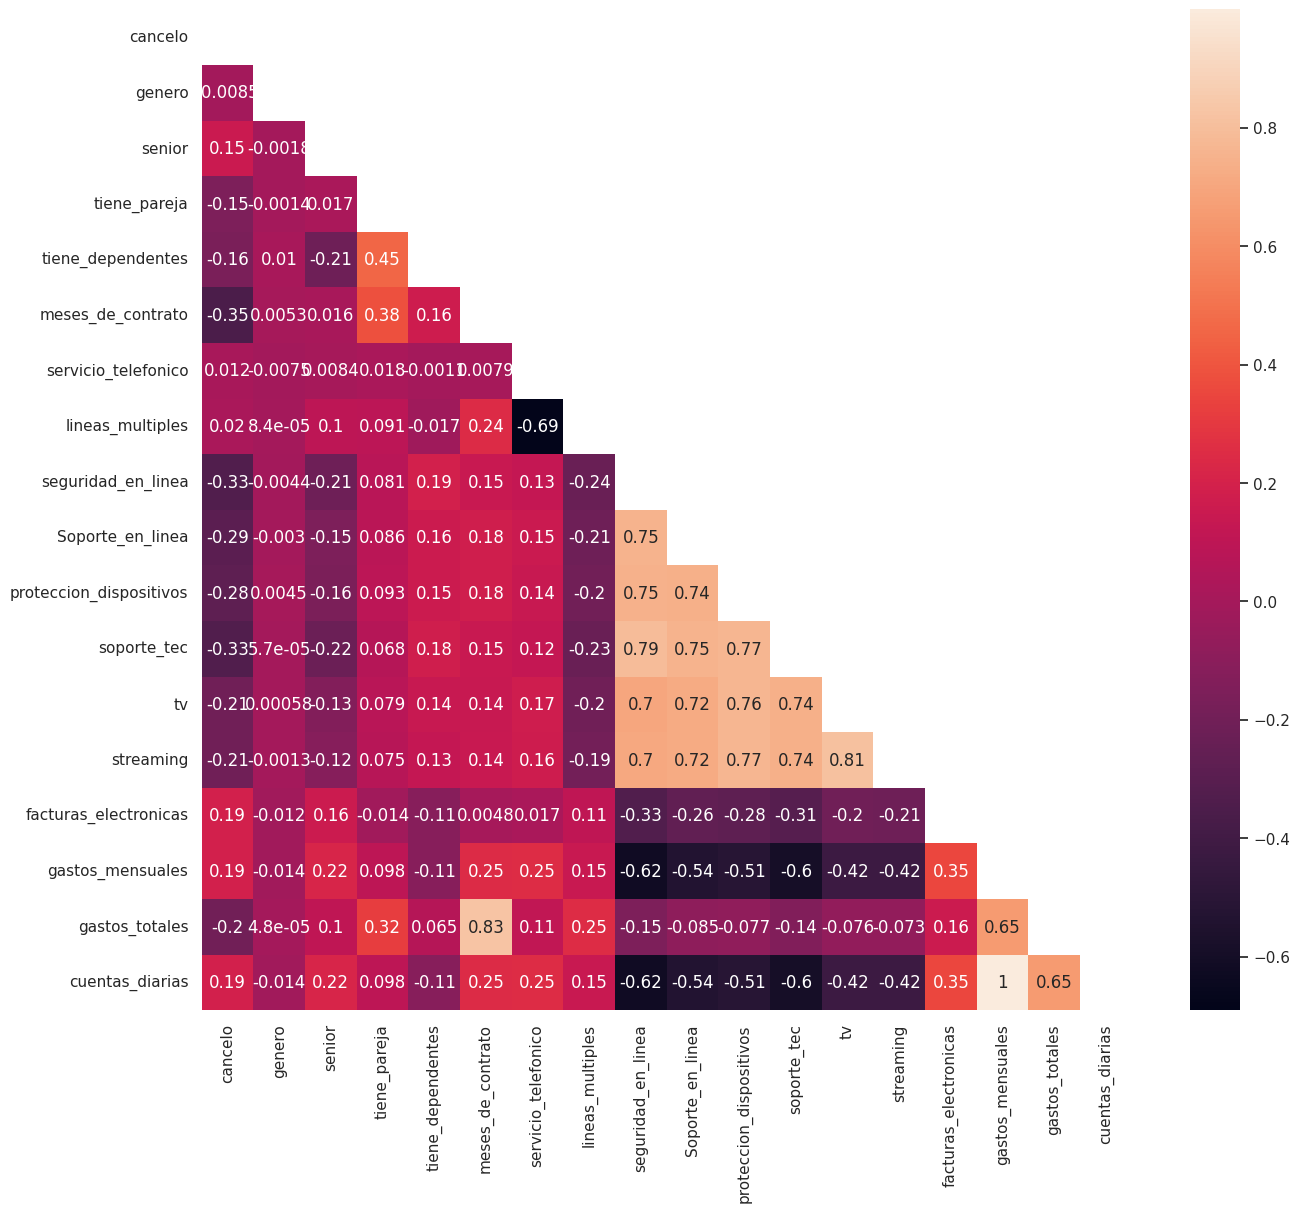

In [234]:
plt.figure(figsize=(15,13))
# computamos matriz de correlación
cols = [col for col in df_normalizado.columns if col not in ['ID', 'servicio_internet', 'tipo_contrato', 'metodo_pago']]
corr_matrix = df_normalizado.loc[:, cols].corr()
# esto nos permite graficar sólo la parte superior o inferior de la matriz
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
# plot
sns.heatmap(corr_matrix,mask=mask,annot=True);

#📄Informe final

Finaliza el desafío elaborando un informe dentro del mismo notebook que resuma todo el trabajo realizado. El informe debe incluir:

🔹 Introducción: Explica el objetivo del análisis y el problema de evasión de clientes (Churn).

🔹 Limpieza y Tratamiento de Datos: Describe los pasos realizados para importar, limpiar y procesar los datos.

🔹 Análisis Exploratorio de Datos: Presenta los análisis realizados, incluyendo gráficos y visualizaciones para identificar patrones.

🔹 Conclusiones e Insights: Resume los principales hallazgos y cómo estos datos pueden ayudar a reducir la evasión.

🔹 Recomendaciones: Ofrece sugerencias estratégicas basadas en tu análisis.

Asegúrate de que el informe esté bien estructurado, claro y respaldado por visualizaciones que refuercen tus conclusiones. 🚀]

###Introduccion

Introducción
La cancelación de servicios por parte de los clientes representa un desafío crítico para la sostenibilidad y el crecimiento de cualquier empresa. Comprender las razones detrás de este comportamiento permite anticiparse a posibles pérdidas y desarrollar estrategias efectivas de retención.
En este contexto, el presente informe analiza el comportamiento de cancelación en diferentes segmentos de clientes, identificando aquellos con mayor tasa de fuga y los posibles factores que influyen en esta decisión.

Objetivo
Comprender qué segmentos de clientes presentan la mayor tasa de cancelación, con el fin de actuar de manera preventiva, mejorar la experiencia del cliente y minimizar la fuga.

Contenido del Informe

🔹 Limpieza y Tratamiento de Datos
Descripción de los pasos realizados para importar, limpiar y procesar la información, asegurando su calidad y consistencia para el análisis.

🔹 Análisis Exploratorio de Datos (EDA)
Presentación de los análisis y visualizaciones empleadas para identificar patrones, tendencias y relaciones relevantes en los datos.

🔹 Conclusiones e Insights
Resumen de los principales hallazgos, destacando factores clave asociados a la cancelación del servicio y su posible impacto en la retención.

🔹 Recomendaciones
Propuestas estratégicas y acciones sugeridas basadas en los resultados obtenidos, orientadas a disminuir la fuga de clientes y fortalecer su fidelización.

###Limpieza y tratamientos de datos

Los datos provienen desde un archivo en formato json, que fue necesario normalizar, borrar filas con datos vacios (como los nan no superaban el 5%, no es necesario mantenerlo aplicar menodos mas complejos de sustitucion de datos).

El siguiente paso consistio en realizar cambios de nombres en algunas columnas y cambiar los valores desde str a valores numericos.

por ultimo se creo la columna gasto diario

### Analisis exploratorios

Se observa que casi un 30% de los clientes se han fugado en el ultimo tiempo

/tmp/ipython-input-2013198362.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(
/tmp/ipython-input-2013198362.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['No','Si'])


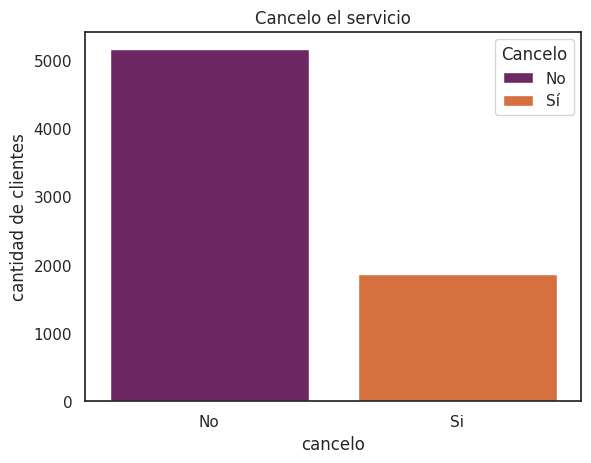

In [235]:
genero_c()

Comparando la fuga por genero, tipo de contrato versus monto a pagar diario, no se encontraron mayores diferencias en el caso del genero, pero si se observa que los clientes que pagan mes a mes, poseen una menor fuga

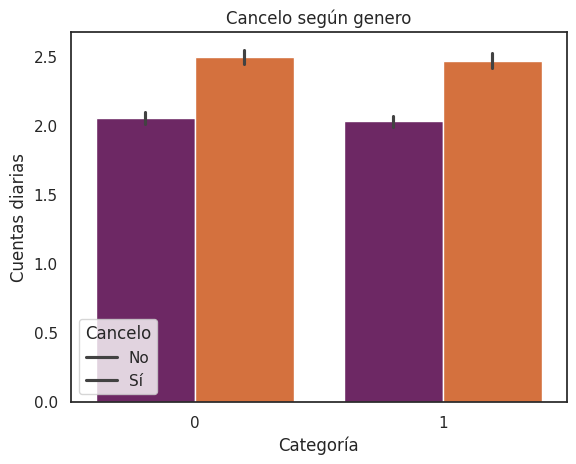

In [236]:
genero()

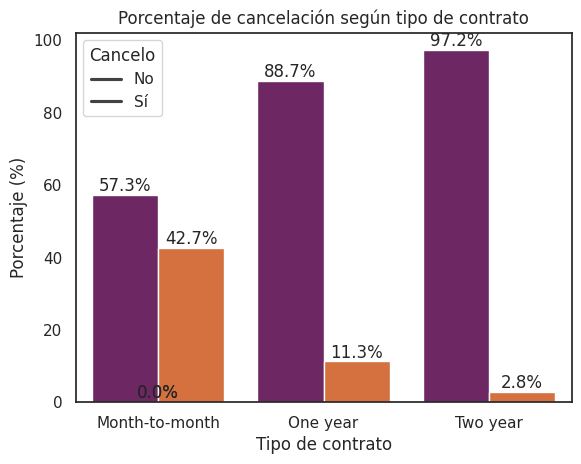

In [237]:
tipo_de_contrato()

Los clientes que posee un mayor valor a pagar, son mas propensos a fugarse

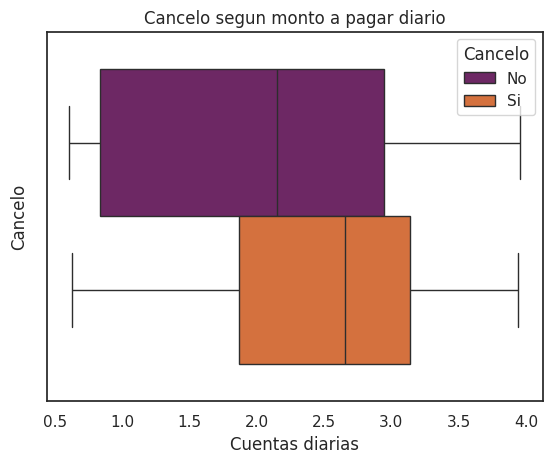

In [238]:
monto_pagar_diario()

Hay una mayor tasa de de fuga en clientes que contratan fibra optica versus otros servicios

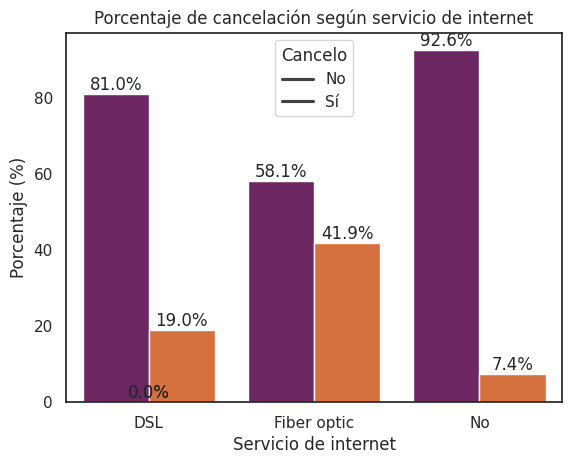

In [239]:
servicio_internet()

Se observa una alta tasa de cancelacion en los clientes que poseen servicio telefonico, tienen pareja, al igual que clientes que no poseen servicios adicionales, como soporte o streaming

/tmp/ipython-input-2586374018.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(data=df_normalizado,x=var,stat='percent',ax=ax,palette='inferno')
/tmp/ipython-input-2586374018.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(data=df_normalizado,x=var,stat='percent',ax=ax,palette='inferno')
/tmp/ipython-input-2586374018.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(data=df_normalizado,x=var,stat='percent',ax=ax,palette='inferno')
/tmp/ipython-input-2586374018.py:17: FutureWarning: 

Passing `palette` without assig

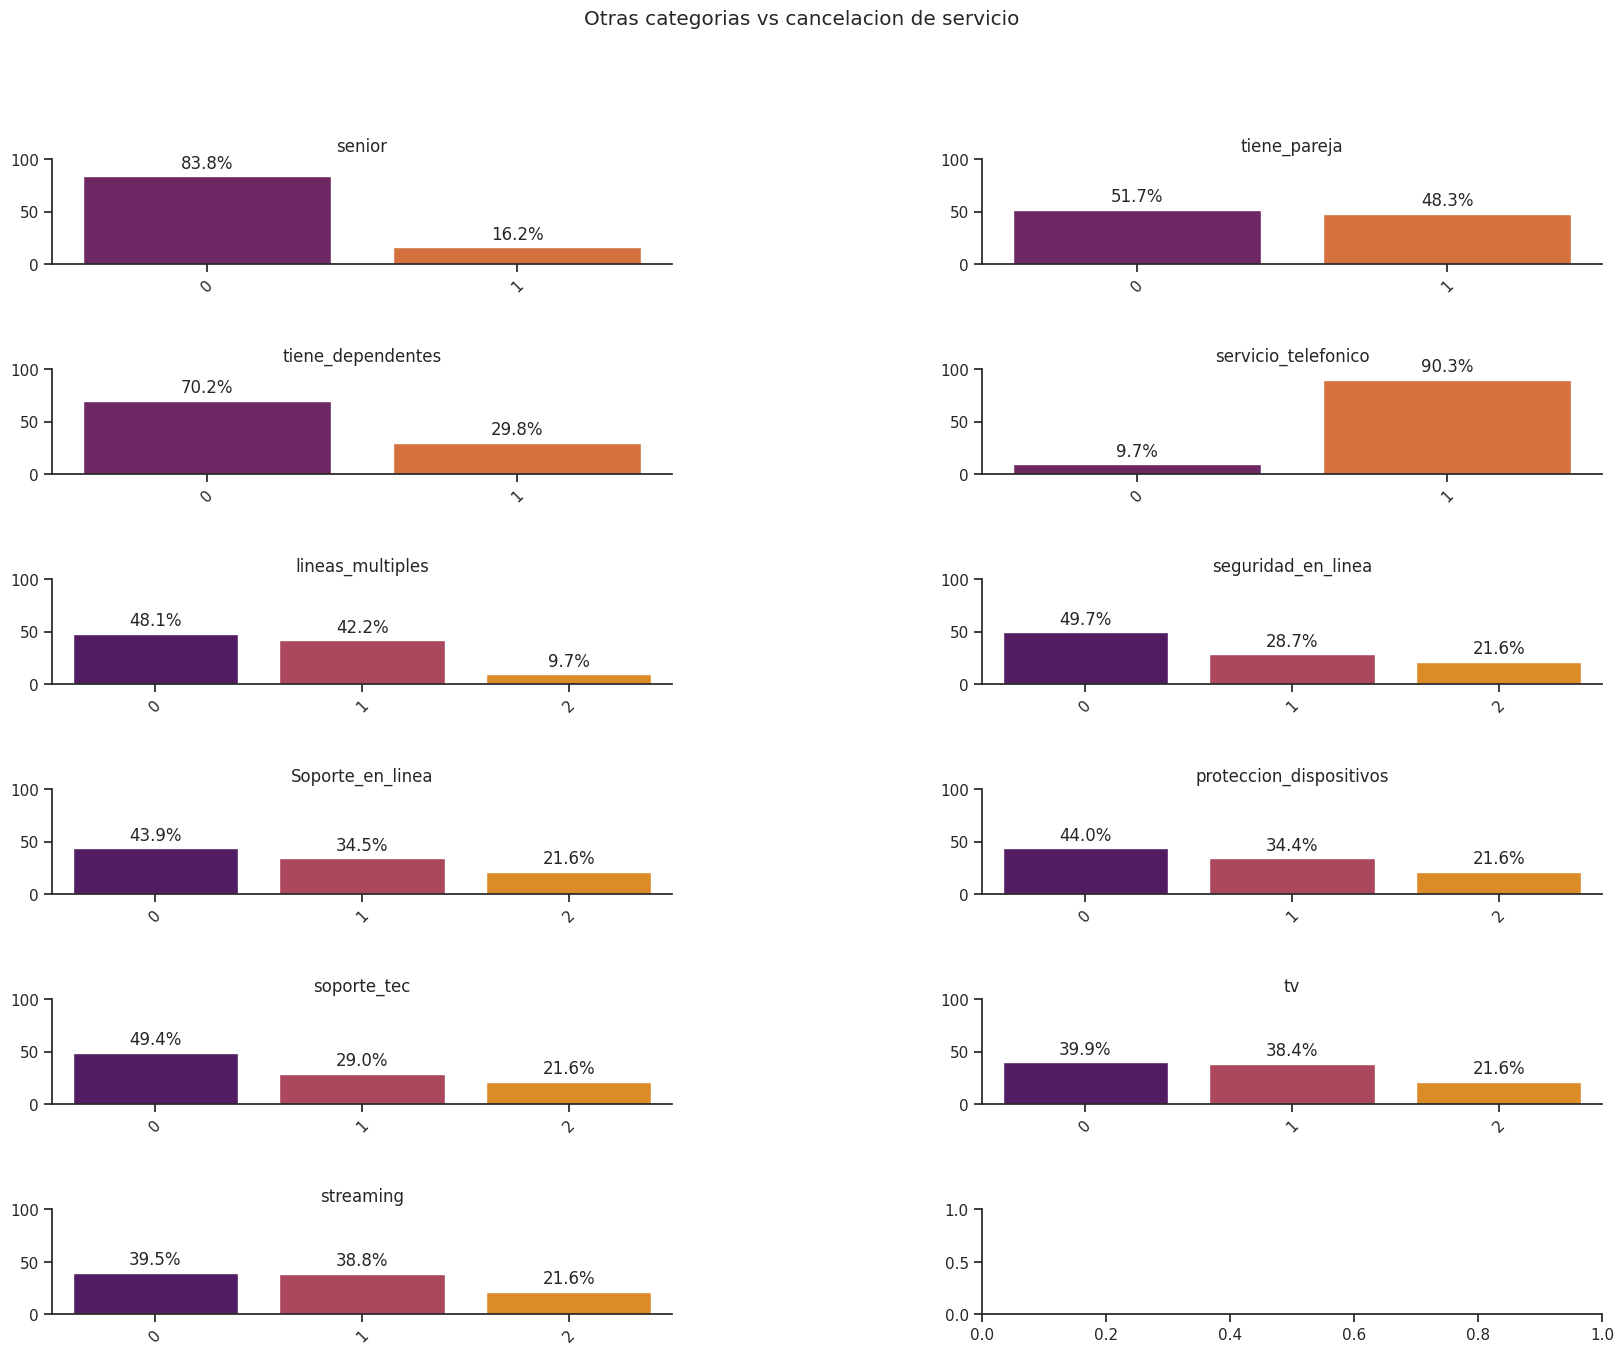

In [292]:
otros()

##Propuestas

+ A los clientes que esten con un alta probabilidad de cancelar, se deberia ofrecer servicios de soporte sin costo por 3 o 6 meses
+ Se debe intentar ofrecer a los clientes promociones, para modificar los tipos de contratos, hacia los que poseen una mejor retencion
+ revisar los clientes que estan con un alto monto a pagar diario, dado que estos poseen una alta fuga, ofrecer promociones, o mejores condiciones del servicio
+ mejorar la calidad del internet optico
+ revisar el servicio telefonico y sus motivos de alta tasa de cancelacion. faltan datos para saber motivos, ej tecnologia obsoleta